# Caso 4. Arbol de Regresión con datos Advertising. Programación Python

## Date: 19/10

## Autor:

    EZEQUIEL OLIVAS MELENDEZ

# Objetivo
Crear y evaluar un modelo de árbol de regresión para predecir las ventas con datos simulados de una empresa dependiendo de las inversiones realizadas en publicidad.

# Descripción

-   Se utiliza programación Python

-   Cargar librerías y datos

-   Limpiar datos si es necesario

-   Explorar datos

-   Partir los datos en datos de entrenamiento y datos de validación 70% y 30%

-   Crear modelo de regresión con los datos de entrenamiento

-   Predicciones

-   Evaluar predicciones con respecto a datos reales

-   Determinar el estadístico *rmse* para evaluar con respecto a otros modelos

-   Interpretar el caso

# Fundamento teórico

Los algoritmos de aprendizaje basados en árbol se consideran uno de los mejores y más utilizados métodos de aprendizaje supervisado. Potencían modelos predictivos con alta precisión, estabilidad y facilidad de interpretación.

Los árboles de clasificación y **regresión** son métodos que proporcionan modelos que satisfacen objetivos tanto predictivos como explicativos.

Algunas ventajas son su sencillez y la representación gráfica mediante árboles y, por otro, la definición de reglas de asociación entre variables que incluye expresiones de condición que permiten explicar las predicciones.

Se pueden usar para regresiones con variables dependientes que tienen valores numéricos continuos o para clasificaciones con variables categóricas.

Utilizar un árbol de regresión para crear un modelo explicativo y predictivo para una variable cuantitativa dependiente basada en variables explicativas independientes cuantitativas y cualitativas [@xlstatbyaddinsoft].

Un árbol de regresión consiste en hacer preguntas de tipo $¿x_k < c?$ para cada una de las covariables, de esta forma el espacio de las covariables es divido en hiper-rectángulos (con el resultado de las condicionales) de las observaciones que queden dentro de un hiper-rectángulo tendrán el mismo valor estimado $\hat{y}$ o $Y$ . [@hernández2021]

Por otra parte, bajo el paradigma divide y vencerás, usando árboles de regresión y decisión y correspondientes reglas, el árbol representa el modelo similar a un diagrama de flujo en el que los nodos de decisión, los nodos de hoja y las ramas definen una serie de decisiones que se pueden usar para generar predicciones. Siguiendo las reglas se encuentran predicciones en la hoja final. . [@lantz2013]

# Desarrollo

Para trabajar con código Python, se deben cargan las librerías de *Python* previamente instaladas con la función *py_install()* de la librería *reticulate* de R.

La función *repl_python()* se utilizar para ejecutar ventana de comando o *shell* de *Python.*

Se recomienda instalar estos paquetes de *Python*

-   *py_install(packages = "pandas")*

-   *py_install(packages = "matplotlib")*

-   *py_install(packages = "numpy")*

-   *py_install(packages = "sklearn") en R cloud*

-   *py_install("scikit-learn") R Studio local*

-   *py_install(packages = "statsmodels.api")*

-   *py_install(packages = "seaborn")*

-   En terminal de Python se puede actualizar con c*onda create -n py3.8 python=3.8 scikit-learn pandas numpy matplotlib*

## Cargar librerías

In [62]:
# Tratamiento de datos
import numpy as np
import pandas as pd
# Gráficos
import matplotlib.pyplot as plt
# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

## Cargar datos

In [63]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9
...,...,...,...,...,...,...,...
195,196,196,38.2,3.7,13.8,248.841073,7.6
196,197,197,94.2,4.9,8.1,118.041856,9.7
197,198,198,177.0,9.3,6.4,213.274671,12.8
198,199,199,283.6,42.0,66.2,237.498063,25.5


In [64]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
# datos.columns
datos.dtypes

Observaciones y variables:  (200, 7)
Columnas y tipo de dato


Unnamed: 0      int64
X               int64
TV            float64
Radio         float64
Newspaper     float64
Web           float64
Sales         float64
dtype: object

Se describen las variables independientes: TV, Radio Newpaper y la variable dependiente Sales.

Valor de etiqueta o variable objetivo deendiente(ventas): que significa el volumen de ventas del producto correspondiente

Las variables independientes: (TV, Radio, Periódico, WEB):

-   TV: son los costos de la publicidad en TV (en miles)

-   Radio: costos de publicidad invertidos en medios de difusión radio;

-   Newspaper Periódico: costos publicitarios para medios impresos.

-   Web: Costos de publicidad invertidos en herramientas digitales.

## Limpiar datos

Quitar las primeras columnas y dejar TV Radio NewsPaper Web y Sales

In [65]:
datos = datos[['TV','Radio', 'Newspaper', 'Web', 'Sales']]
datos.describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


## Datos de entrenamiento y datos de validación

La función _train_test_split()_ parte los datos originales el 70% y 30% para datos de entrenamiento y validación y con el argumento _datos.drop(columns = "Sales"), datos['Sales']_ solo incluye las variables independientes; la semilla de aleatoriedad es 1287


In [66]:
X_entrena, X_valida, Y_entrena, Y_valida = train_test_split(datos.drop(columns = "Sales"), datos['Sales'],train_size=.70,  random_state=1287)

### Datos de entrenamiento


In [67]:
print("Estructura de datos de entrenamiento... ", X_entrena.shape)
print(X_entrena)
print(X_entrena[['TV']], X_entrena[['Radio']], X_entrena[['Newspaper']], X_entrena[['Web']])

Estructura de datos de entrenamiento...  (140, 4)
        TV  Radio  Newspaper         Web
140   73.4   17.0       12.9  174.772137
133  219.8   33.5       45.1  171.478018
24    62.3   12.6       18.3  256.965240
6     57.5   32.8       23.5  246.811598
172   19.6   20.1       17.0  155.583662
..     ...    ...        ...         ...
23   228.3   16.9       26.2   51.170073
183  287.6   43.0       71.8  154.309725
177  170.2    7.8       35.2  104.917344
106   25.0   11.0       29.7   15.938208
27   240.1   16.7       22.9  228.157437

[140 rows x 4 columns]
        TV
140   73.4
133  219.8
24    62.3
6     57.5
172   19.6
..     ...
23   228.3
183  287.6
177  170.2
106   25.0
27   240.1

[140 rows x 1 columns]      Radio
140   17.0
133   33.5
24    12.6
6     32.8
172   20.1
..     ...
23    16.9
183   43.0
177    7.8
106   11.0
27    16.7

[140 rows x 1 columns]      Newspaper
140       12.9
133       45.1
24        18.3
6         23.5
172       17.0
..         ...
23        26.2
18

## Modelo de Árbol de Regresión

Se construye el modelo de árbol de regresión.

La clase *DecisionTreeRegressor* del módulo *sklearn.tree* permite entrenar árboles de decisión para problemas de regresión.

Algunos parámetros de la función serían los siguientes:

-   `max_depth`: profundidad máxima que puede alcanzar el árbol.

-   `min_samples_split`: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento `ceil(min_samples_split * n_samples)`.

-   `min_samples_leaf`: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento `ceil(min_samples_split * n_samples)`.

-   `max_leaf_nodes`: número máximo de nodos terminales.

-   `random_state`: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero. [@amat2020]


In [68]:
modelo_ar = DecisionTreeRegressor(
            max_depth         = 1000,
            random_state      = 1287
          )

Utilizar los datos de entrenamiento (X_entrena y Y_entrena) con el modelo de árbol de regresión.


In [69]:
modelo_ar.fit(X_entrena, Y_entrena)


DecisionTreeRegressor(max_depth=1000, random_state=1287)

### Visualización del modelo

Toda vez creado el modelo, se puede representar mediante la combinación de las funciones *plot_tree()* y *export_text()*.

La función *plot_tree()* dibuja la estructura del árbol y muestra el número de observaciones y valor medio de la variable respuesta en cada nodo.

La función *export_text()* representa esta misma información en formato texto. [@amat2020].

Profundidad del árbol: 11
Número de nodos terminales: 132


[Text(0.4869064245810056, 0.9583333333333334, 'TV <= 159.95\nsamples = 140\nvalue = 14.32'),
 Text(0.21717877094972068, 0.875, 'TV <= 69.8\nsamples = 71\nvalue = 10.67'),
 Text(0.06319832402234637, 0.7916666666666666, 'TV <= 15.05\nsamples = 31\nvalue = 8.31'),
 Text(0.01675977653631285, 0.7083333333333334, 'TV <= 3.05\nsamples = 7\nvalue = 5.33'),
 Text(0.0111731843575419, 0.625, 'samples = 1\nvalue = 1.6'),
 Text(0.0223463687150838, 0.625, 'Newspaper <= 50.1\nsamples = 6\nvalue = 5.95'),
 Text(0.0111731843575419, 0.5416666666666666, 'Newspaper <= 5.75\nsamples = 4\nvalue = 5.48'),
 Text(0.00558659217877095, 0.4583333333333333, 'samples = 1\nvalue = 5.7'),
 Text(0.01675977653631285, 0.4583333333333333, 'Newspaper <= 37.6\nsamples = 3\nvalue = 5.4'),
 Text(0.0111731843575419, 0.375, 'samples = 2\nvalue = 5.3'),
 Text(0.0223463687150838, 0.375, 'samples = 1\nvalue = 5.6'),
 Text(0.0335195530726257, 0.5416666666666666, 'TV <= 8.25\nsamples = 2\nvalue = 6.9'),
 Text(0.027932960893854747, 

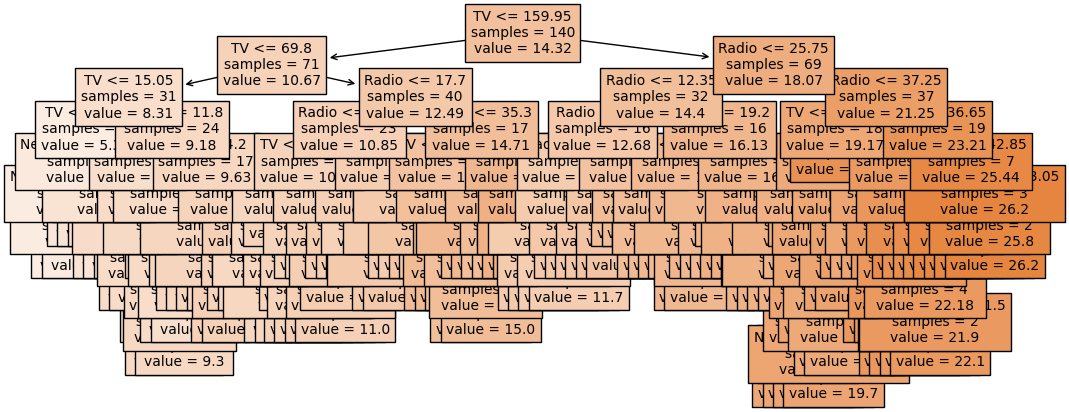

In [70]:
fig, ax = plt.subplots(figsize=(12, 5))
print(f"Profundidad del árbol: {modelo_ar.get_depth()}")
print(f"Número de nodos terminales: {modelo_ar.get_n_leaves()}")
plot = plot_tree(
            decision_tree = modelo_ar,
            feature_names = datos.drop(columns = "Sales").columns,
            class_names   = 'Sales',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )
plot

In [71]:
texto_modelo = export_text(
                    decision_tree = modelo_ar,
                    feature_names = list(datos.drop(columns = "Sales").columns)
               )
print(texto_modelo)

|--- TV <= 159.95
|   |--- TV <= 69.80
|   |   |--- TV <= 15.05
|   |   |   |--- TV <= 3.05
|   |   |   |   |--- value: [1.60]
|   |   |   |--- TV >  3.05
|   |   |   |   |--- Newspaper <= 50.10
|   |   |   |   |   |--- Newspaper <= 5.75
|   |   |   |   |   |   |--- value: [5.70]
|   |   |   |   |   |--- Newspaper >  5.75
|   |   |   |   |   |   |--- Newspaper <= 37.60
|   |   |   |   |   |   |   |--- value: [5.30]
|   |   |   |   |   |   |--- Newspaper >  37.60
|   |   |   |   |   |   |   |--- value: [5.60]
|   |   |   |   |--- Newspaper >  50.10
|   |   |   |   |   |--- TV <= 8.25
|   |   |   |   |   |   |--- value: [6.60]
|   |   |   |   |   |--- TV >  8.25
|   |   |   |   |   |   |--- value: [7.20]
|   |   |--- TV >  15.05
|   |   |   |--- Radio <= 11.80
|   |   |   |   |--- TV <= 44.10
|   |   |   |   |   |--- Newspaper <= 17.25
|   |   |   |   |   |   |--- value: [7.60]
|   |   |   |   |   |--- Newspaper >  17.25
|   |   |   |   |   |   |--- TV <= 26.25
|   |   |   |   |   |   | 

## Predicciones

La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el _mse_, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0. [@amat2020].

### Evaluar predictores


In [72]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "Sales").columns,
                             'importancia': modelo_ar.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo


,predictor,importancia
0,TV,0.65648
1,Radio,0.33975
3,Web,0.00202
2,Newspaper,0.00175


Se hacen predicciones con los datos de validación usando el modelo de árbol de predicción.


In [73]:
predicciones = modelo_ar.predict(X = X_valida)


### RMSE

*rmse* Root Mean Stándard Error (*Root-mean-square deviation*), este valor normalmente se compara contra otro modelo y el que esté mas cerca de cero es mejor.

La raiz del Error Cuadrático Medio (*rmse*) es una métrica que dice qué tan lejos están los valores predichos de los valores observados o reales en un análisis de regresión, en promedio. Se calcula como:

$$
rmse = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$

*RMSE* es una forma útil de ver qué tan bien un modelo de regresión puede ajustarse a un conjunto de datos.

Cuanto mayor sea el *rmse*, mayor será la diferencia entre los valores predichos y reales, lo que significa que peor se ajusta un modelo de regresión a los datos. Por el contrario, cuanto más pequeño sea el rmse, mejor podrá un modelo ajustar los datos.


In [74]:
rmse = mean_squared_error(
        y_true  = Y_valida,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.363573735935587


In [75]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Y_valida, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones)))


Mean Squared Error: MSE 1.859333333333334
Root Mean Squared Error RMSE: 1.363573735935587


# Interpretación


Con este modelo y con estos datos interprete lo siguiente:

- ¿Cuál es el contexto de los datos?

    Que los datos representan la cantidad de inversión de una empresa en varios canales de publicidad para vender 

- ¿Cuántas observaciones se analizan y cuáles son las variables de interés?

    TV  Radio  Newspaper Web y se analizan mil veces

- ¿Cuáles son las variables independientes y dependientes?

    TV  Radio  Newspaper Web: independientes
    Sales: dependientes

- ¿Cuál es el porcentaje de datos de entrenamiento y datos de validación ?

    70-30%

- ¿Cuál es el valor de _RMSE_ y qué significaría este valor?

    1.363573735935587 que el modelo es más aceptable que la regresión lineal multiple

- ¿Puede haber otro modelo más óptimo para estos datos?

    Probablemente

- ¿Que tan confiables son las predicciones con datos nuevos con este modelo y con estos datos?

    Más confiables  
